# Heart Rate Lineplot

In [9]:
import pandas
from pathlib import Path

import seaborn
from matplotlib import pyplot


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [10]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'

In [11]:
ds = pandas.read_pickle(heart_df_pickle)

heart_rate = ds['type'] == 'HKQuantityTypeIdentifierHeartRate'
ds = ds.loc[heart_rate, ['date', 'value']]
ds = ds.rename(columns={'value': 'heart rate'})

### Review the data's structure

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180408 entries, 5 to 180412
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        180408 non-null  datetime64[ns]
 1   heart rate  180408 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 MB


In [13]:
ds.loc[:, 'heart rate'].agg(['mean', 'median', 'std', 'skew'])

mean      74.671974
median    72.000000
std       13.330927
skew       1.169036
Name: heart rate, dtype: float64

In [14]:
ds.describe()

,heart rate
count,180408.000000
mean,74.671974
std,13.330927
min,41.000000
25%,65.000000
50%,72.000000
75%,82.000000
max,204.000000


In [15]:
rate_count = ds['heart rate'].astype('int').value_counts()
rate_count[rate_count.index].head()

67    6341
66    6260
68    6178
69    5928
65    5919
Name: heart rate, dtype: int64

### Lineplot

[Text(0, 0.5, 'Observation Count')]

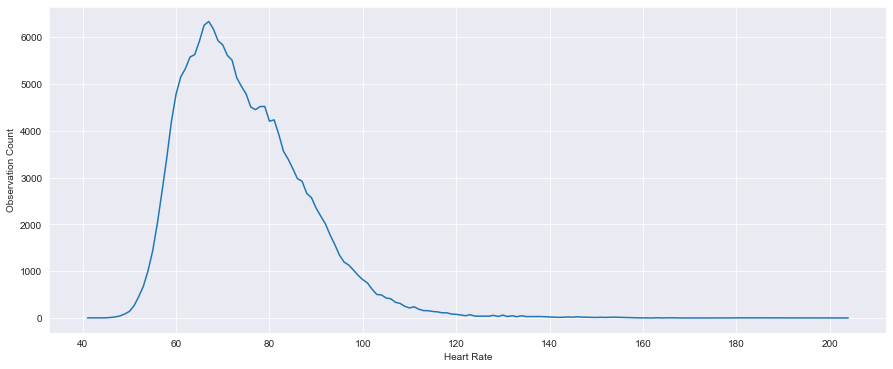

In [16]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.lineplot(data=rate_count, x=rate_count.index, y=rate_count[rate_count.index])
axes.set(xlabel="Heart Rate")
axes.set(ylabel="Observation Count")